$$L=\frac{m}{2} (\dot{x}^2+\dot{y}^2) - \alpha(\frac{1}{\sqrt{x^2+y^2}} + \frac{1}{\sqrt{(x-R_x)^2+(y-R_y)^2}}) $$
$$m\ddot{x} = \alpha (\frac{x}{(x^2+y^2)^{3/2}}+\frac{x-R_x}{((x-R_x)^2+(y-R_y)^2)^{3/2}})$$
$$m\ddot{y} = \alpha (\frac{y}{(x^2+y^2)^{3/2}}+\frac{y-R_y}{((x-R_x)^2+(y-R_y)^2)^{3/2}})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.collections import LineCollection
import os
%matplotlib inline

In [2]:
m = 1
alpha = 1
R = 1
def a_x(x,y,m=m,alpha=alpha,R=R):
    return -alpha/m *((x/(x**2+y**2)**1.5)+(x-R)/((x-R)**2+y**2)**1.5) 
def a_y(x,y,m=m,alpha=alpha,R=R):
    return -alpha*y/m *((1/(x**2+y**2)**1.5)+1/((x-R)**2+y**2)**1.5)

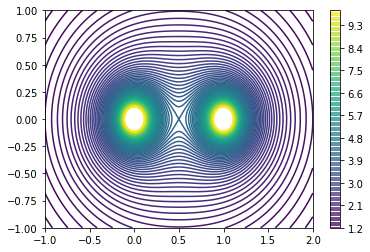

In [71]:
def plot_potential(n, lim):
    X = np.linspace(-lim, 1 + lim, n)
    Y = np.linspace(-lim, lim, n)
    x, y = np.meshgrid(X, Y)
    V = alpha*(1/(x**2+y**2)**0.5+1/((x-R)**2+y**2)**0.5)
    V[V > 10] = 10
#     plt.contourf(x, y, V, 100)
    plt.contour(x, y, V, 100)
    plt.colorbar()
    plt.show()
plot_potential(1000, 1)

In [3]:
def rdot(r, t):
    x, y, v_x, v_y = r
    return np.array([v_x, v_y, a_x(x,y), a_y(x,y)])

In [4]:
def trajektoria(v_x, v_y,n_t = int(10**4), maxt=10):
    r_0 = np.array([0.6,1,v_x,v_y])
    t = np.linspace(0,maxt,int(n_t))
    r = odeint(rdot, r_0, t,full_output=1, mxstep=5000000)
    x, y, v_x, v_y = r[0].T
    E = m/2 * (v_x**2+v_y**2) - m * alpha*(1/(x**2+y**2)**0.5+1/((x-R)**2+y**2)**0.5)
    return x, y, t, E

In [31]:
def wykres(v_x, v_y,n_t = int(10**4),maxt = 100, energy=False):
    x,y, t, E = trajektoria(v_x, v_y,n_t,maxt)
    
    fig, ax_trajectory = plt.subplots()
    # stack solution to colored line plots
    points = np.array([x,y]).transpose().reshape(-1,1,2)
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    lc = LineCollection(segs, cmap=plt.get_cmap('viridis'))
    lc.set_array(t) # color the segments by our parameter
    ax_trajectory.add_collection(lc) # add the collection to the plot
    ax_trajectory.plot(x, y, alpha=0)
    
    ax_trajectory.plot([0,1],[0,0],'ro') #Pozostałe dwa ciała
    ax_trajectory.grid()
    ax_trajectory.set_xlabel('x [m]')
    ax_trajectory.set_ylabel('y [m]')
    title = r'$v_x(t=0) = ' + f"{v_x:.2f}" +  r' \frac{m}{s}, v_y(t=0) = ' + f"{v_y:.2f}" +\
        r' \frac{m}{s}, E = ' + f"{E[0]:.3f}" + 'J$'
    ax_trajectory.set_title(title)
    plt.colorbar(lc, label='t [s]', ax=ax_trajectory)
    try:
        os.mkdir('nowe_wykresy')
    except FileExistsError:
        pass
    fig.savefig(f'nowe_wykresy/trajektoria{v_x:.3f}_{v_y:.3f}_{E[0]:.3f}_{maxt}.png', dpi=400)
    plt.close(fig)
    
    if energy:
        fig, ax_energy = plt.subplots()
        ax_energy.grid()
        ax_energy.set_xlabel('t [s]')
        ax_energy.set_ylabel('E [J]')
        ax_energy.set_title('Energia od czasu')
        E_diff = (E - E[0])/E[0]

        points = np.array([t,E_diff]).transpose().reshape(-1,1,2)
        segs = np.concatenate([points[:-1],points[1:]],axis=1)
        lc = LineCollection(segs, cmap=plt.get_cmap('viridis'))
        lc.set_array(t) # color the segments by our parameter
        ax_energy.add_collection(lc) # add the collection to the plot

        xmin = t.min() if t.min() < 0 else 0
        xmax = t.max() if t.max() > 0 else 0
        ymin = E_diff.min() if E_diff.min() < 0 else 0
        ymax = E_diff.max() if E_diff.max() > 0 else 0
        ax_energy.set_xlim(xmin, xmax) # line collections don't auto-scale the plot
        ax_energy.set_ylim(ymin, ymax)
        fig.savefig(f'nowe_wykresy/energia{v_x:.3f}_{v_y:.3f}_{E[0]:.3f}_{maxt}.png', dpi=400)
        plt.close(fig)

In [41]:
wykres(0,0,maxt=50)

In [17]:
wykres(0,0)

In [18]:
wykres(1,1)

In [19]:
wykres(1,-1)

In [20]:
wykres(-1,-1)

In [21]:
wykres(1,0)

In [22]:
wykres(0,1)

In [23]:
wykres(0,-1)

In [24]:
for vx in np.linspace(0,1.5,6):
    wykres(vx,0)

In [25]:
for vy in np.linspace(-1.5,1.5,6):
    wykres(0,vy)

In [26]:
for v in np.linspace(-1.3,1.3,6):
    wykres(v,v)

In [27]:
for v in np.linspace(-1.3,1.3,6):
    wykres(v,-v)

In [56]:
for vx, vy in (np.random.random((20,2))*2-1)*1.5:
    wykres(vx,vy)

In [47]:
wykres(1.5,1,10e5,1000,energy=True)

In [53]:
wykres(1.464,1.2,energy=True)